# Задание 1. Построение трендов

In [2]:
import os
os.chdir("C:/Users/HP/Documents/analysis/TS/data/")

# Способ 1

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_excel('data.xls', sheet_name='Material 1')

In [18]:
dates = data.loc[data.index == 0].values[0, 2:]
val = data.loc[data.index == 1].values[0, 2:]

In [19]:
my_data = pd.DataFrame(data={"Date": dates, "Value": val})
my_data.head()

,Date,Value
0,2007-01-01,26.45
1,2007-02-01,23.89
2,2007-03-01,25.95
3,2007-04-01,30.03
4,2007-05-01,28.96


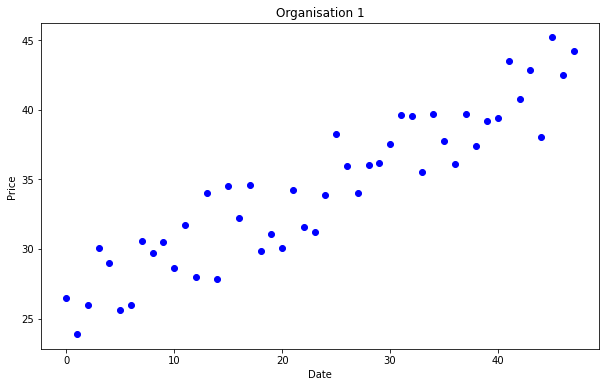

In [168]:
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(my_data["Value"], 'bo')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Organisation 1")
plt.show()

### Модель линейной регрессии

In [29]:
y = my_data['Value'].values
X = np.arange(1, y.size + 1).reshape(-1, 1)

In [170]:
reg = LinearRegression(fit_intercept=True).fit(X, y)

In [171]:
print('Коэффициенты:', [np.round(reg.coef_[0], 3), np.round(reg.intercept_, 3)], '\n')
print('MSE: %.2f'
      % mean_squared_error(y, reg.predict(X)), '\n')
print('Коэффициент детерминации: %.2f'
      % r2_score(y, reg.predict(X)))

Коэффициенты: [0.36, 25.542] 

MSE: 4.14 

Коэффициент детерминации: 0.86


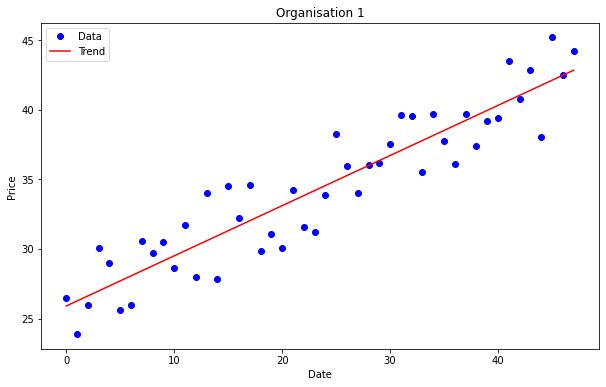

In [173]:
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(my_data["Value"], 'bo')
plt.plot(reg.predict(X), "r")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Organisation 1")
plt.legend(["Data", "Trend"])
plt.show()

# Способ 2

In [108]:
from pandas import read_csv
df = read_csv('task1.csv',parse_dates = True, index_col = 0,delimiter=';',decimal=',')
df.head()

,Рыночные цены на материал 1 (руб.)
Дата,
2007-01-01,26.45
2007-02-01,23.89
2007-03-01,25.95
2007-04-01,30.03
2007-05-01,28.96


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2007-01-01 to 2010-12-01
Data columns (total 1 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Рыночные цены на материал 1 (руб.)  48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


In [110]:
# Переименование столбцов
df_columns, df.columns = df.columns, ('y', )
df_index, df.index.name = df.index.name, 'date'
df.head()

,y
date,
2007-01-01,26.45
2007-02-01,23.89
2007-03-01,25.95
2007-04-01,30.03
2007-05-01,28.96


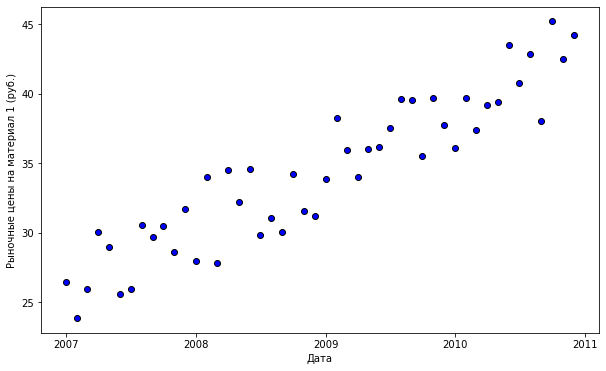

In [111]:
# Визуализация данных с надписями
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10, 6))

plt.xlabel(df_index)
plt.ylabel(df_columns[0])

ax.xaxis.set_major_locator(mpl.dates.YearLocator())
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))

ax.plot(df['y'], marker = 'o', color = (0, 0, 0, 0), markerfacecolor = 'blue')
    
plt.show()

In [112]:
# Добавляем вспомогательный столбец t
import numpy as np
df['t'] = np.arange(1, len(df) + 1)
df.head()

,y,t
date,,
2007-01-01,26.45,1
2007-02-01,23.89,2
2007-03-01,25.95,3
2007-04-01,30.03,4
2007-05-01,28.96,5


In [113]:
# Найдем коэффициенты уравнения тренда
import numpy as np
coef = np.polyfit(df['t'], df['y'], deg = 1)
coef

array([ 0.36008142, 25.54217199])

In [114]:
# Найдем расчетные значения по уравнению тренда
df['y^'] = coef[0] * df['t'] + coef[1]
df['y^'].head()

date
2007-01-01    25.902253
2007-02-01    26.262335
2007-03-01    26.622416
2007-04-01    26.982498
2007-05-01    27.342579
Name: y^, dtype: float64

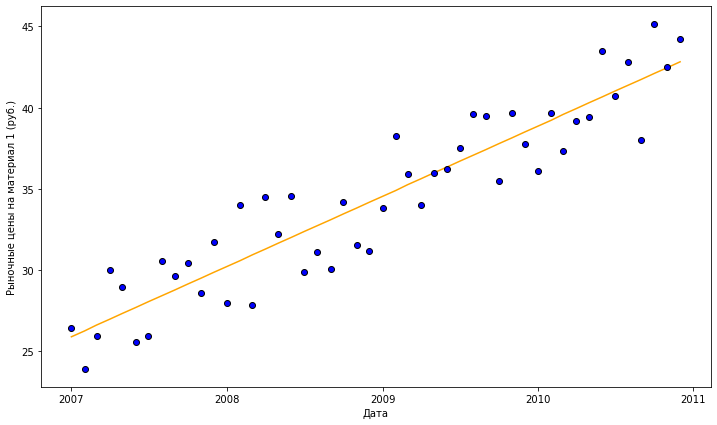

In [115]:
# Изобразим на графике фактические значения и расчетные по тренду
fig, ax = plt.subplots(figsize = (12, 7))

plt.xlabel(df_index)
plt.ylabel(df_columns[0])

ax.plot(df['y^'], color = 'orange')

ax.plot(df['y'], marker = 'o', color = (0, 0, 0, 0), markerfacecolor = 'blue')

ax.xaxis.set_major_locator(mpl.dates.YearLocator())
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))
    
plt.show()

In [116]:
# Строим точечный прогноз по уравнению тренда
n = len(df)

x = np.arange(48, 60)

df_fv = pd.DataFrame({'y' : coef[0] * x + coef[1]}, index = pd.date_range(start = df.index[-1] + np.timedelta64(1, 'M'), 
                                    end   = df.index[-1] + np.timedelta64(13, 'M'), 
                                    freq  = 'MS'))
df_fv.head()

,y
2011-01-01 10:29:06,42.826080
2011-02-01 10:29:06,43.186161
2011-03-01 10:29:06,43.546243
2011-04-01 10:29:06,43.906324
2011-05-01 10:29:06,44.266406


In [118]:
variance = np.sum(np.power(df['y'] - df['y^'], 2)) / (n-1)
sigma =np.power(variance,0.5)
sigma

2.056805546332881

In [119]:
from scipy.stats import t
tstud=t.interval(0.95, len(df)-1)
list(tstud)

[-2.0117405104757546, 2.0117405104757546]

In [120]:
lower=list(tstud)[0]*sigma
lower

-4.137759039729073

In [121]:
upper=list(tstud)[1]*sigma
upper

4.137759039729073

In [122]:
df_fv['y-'] = df_fv['y'] + lower
df_fv['y+'] = df_fv['y'] + upper

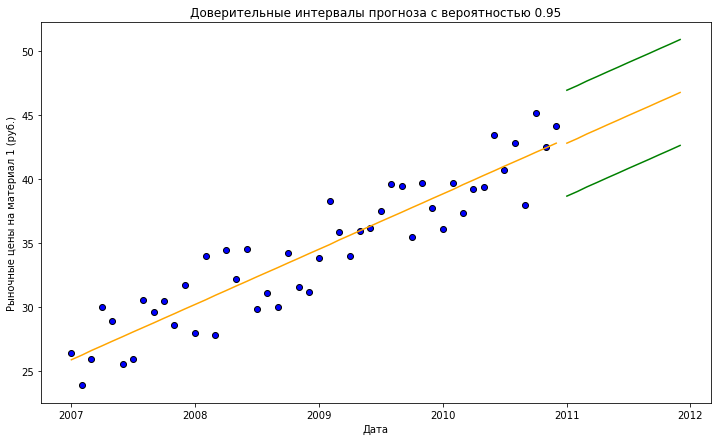

In [123]:
fig, ax = plt.subplots(figsize = (12, 7))

plt.title('Доверительные интервалы прогноза с вероятностью 0.95')
plt.xlabel(df_index)
plt.ylabel(df_columns[0])

ax.plot(df_fv['y-'], color = 'green')
ax.plot(df_fv['y'],  color = 'orange')
ax.plot(df_fv['y+'], color = 'green')

ax.plot(df['y'], marker = 'o', color = (0, 0, 0, 0), markerfacecolor = 'blue')
ax.plot(df['y^'], color = 'orange')

ax.xaxis.set_major_locator(mpl.dates.YearLocator())
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))
    
plt.show()

# Способ 3

Предположим, что одна $\textit{зависимая}$ переменная $Y$ определяется другими переменными, которые называются $\textit{объясняющими}$ переменными (регрессорами). Математическая зависимость, связывающая эти переменные, называется $\textit{моделью регрессии}.$ Мы допускаем, что модель регрессии имеет факт неточности - $\textit{случайный}$ (остаточный) член.

Такая модель имеет следующий вид:
$$ Y_i = \alpha + \beta X_i + \xi_i  $$

$Y_i$ - значение зависимой переменной, $\alpha$ и $\beta$ - постоянные величины - параметры уравнения, $\xi_i$ - случайный член.

Задача регрессионого анализа состоит в получении оценок $\alpha$ и $\beta$ и, следовательно, в определении положения прямой по точкам $\Leftrightarrow$ нужно посроить прямую, в наибольшей степени соответствующую этим точкам.

$a$ - отсечение $Y$, ее оценка - $\alpha$

$b$ - угловой коэффициент, его оценка - $\beta$

Загрузим данные из исходного файла

In [131]:
import numpy as np
import pandas as pd
import scipy

%matplotlib inline
from matplotlib import pyplot as plt

In [124]:
from pandas import read_csv
df = read_csv('task1.csv',parse_dates = True, index_col = 0,delimiter=';',decimal=',')
df.head()

,Рыночные цены на материал 1 (руб.)
Дата,
2007-01-01,26.45
2007-02-01,23.89
2007-03-01,25.95
2007-04-01,30.03
2007-05-01,28.96


In [128]:
# Переименование столбцов
df_columns, df.columns = df.columns, ('y', )
df_index, df.index.name = df.index.name, 'date'
df.head()

,y
date,
2007-01-01,26.45
2007-02-01,23.89
2007-03-01,25.95
2007-04-01,30.03
2007-05-01,28.96


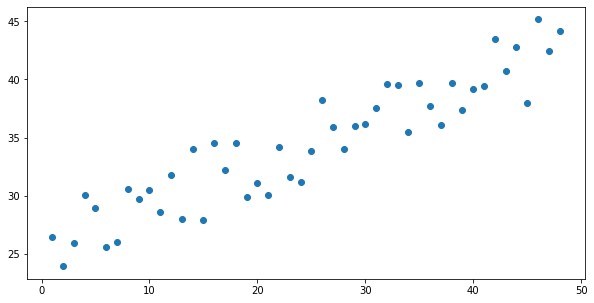

In [129]:
# Визуализация данных
%matplotlib inline
from matplotlib import pyplot as plt

plt.figure(figsize=[10,5])
plt.scatter(range(1,df.shape[0]+1), df.y)

plt.show()

<p><a name="MNK"></a></p>

## МНК

Пусть оцениваемая модель имеет вид: $$\widehat{Y_i} = a+bX_i $$, 
где $\widehat{Y_i}$ - оцененное значение $Y_i$. Наша задача заключается в том, чтобы выяснить, существут ли способы оценки коэффициентов $a,b$ алгебраическим путем.

Введем обозначение: $$e_i = Y_i - \widehat{Y_i} =Y_i - a - bX_i $$

Остаток наблюдений зависит от выбора коэффициентов $a$ и $b$ $\Rightarrow$ задача заключается в том, чтобы выбрать такие $a$ и $b$, при которых ошибки будут минимальными. Неправильно минимизировать сумму остатков, потому что при выборе выборочного среднего модели: $$\sum e_i = 0 $$ 

Пусть у нас имеются $n$ наблюдений $(X_i,Y_i)$, $Y$ зависит от $X$ и мы хотим подобрать уравнение: $$\widehat{Y_i} = a+bX_i$$

Запишем формально нашу задачу в обозначениях метода наименьших квадратов (МНК):

$$ S = \sum (Y_i-\widehat{Y_i})^2 = \sum (Y_i - a - bX_i)^2 \to min $$

Нашей задачей будет аппроксимация функции для исходных данных, обозначенных на рисунке точками.

Для подбора коэффициентов воспользуемся моделью линейной регрессии, реализованной в пакете `sklearn`

In [130]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

Поставим в соответствие индексу его порядковый номер, начиная с единицы. Эти значения будут являться координатами точек по $X$.

In [132]:
X = np.array(range(1,df.shape[0]+1)).reshape(df.shape[0],1)
X[0:5]

array([[1],
       [2],
       [3],
       [4],
       [5]])

Значениями по оси $Y$ будут являться значения столбца `df.y`

In [134]:
y = df.y.values
y

array([26.45, 23.89, 25.95, 30.03, 28.96, 25.58, 25.96, 30.56, 29.67,
       30.46, 28.6 , 31.73, 28.  , 33.99, 27.87, 34.49, 32.22, 34.56,
       29.87, 31.09, 30.06, 34.21, 31.57, 31.18, 33.85, 38.27, 35.92,
       34.01, 36.  , 36.2 , 37.5 , 39.62, 39.51, 35.49, 39.69, 37.74,
       36.08, 39.68, 37.36, 39.21, 39.43, 43.5 , 40.75, 42.84, 38.01,
       45.18, 42.49, 44.2 ])

Обучим нашу модель, модель подберет коэффициенты

In [135]:
assert len(X)==len(y)
model.fit(X, y)

LinearRegression()

Угловой коэффициент линейной регрессии $b$ равен:

In [136]:
coefs = model.coef_
coefs

array([0.36008142])

А отсечение по $Y$, т.е. коэффициент $a$:

In [137]:
const = model.intercept_
const

25.542171985815607

Следовательно, уравнение полученной нами модели по методу наименьших квадратов равно:
$$\widehat{Y_i} = 25.54+0.36X_i $$ 

In [138]:
# Расчетные значения по модели
y_pred = model.predict(X) 
y_pred[0:5]

array([25.9022534 , 26.26233482, 26.62241623, 26.98249765, 27.34257906])

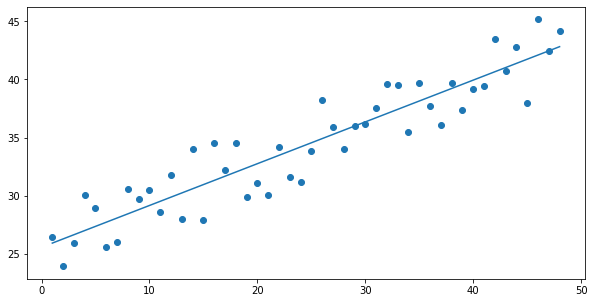

In [139]:
plt.figure(figsize=[10,5])
plt.scatter(range(1,df.shape[0]+1), df.y)
plt.plot(X,y_pred)

plt.show()

<p><a name="hats"></a></p>

## Оценки качества моделей

Цель регрессии - объяснение поведения $Y$. Разброс значений $Y$ можно описать с помощью суммы квадратов отклонений от выборочного среднего.
$$ \sum (Y - \overline{Y})^2 $$

Все показатели корреляции основаны на правиле сложения дисперсий $\Rightarrow$ можно разложить $\textbf{общую сумму квадратов отклонений } $ переменной $Y$ от среднего значения $\overline{Y}$ на две части - $\textbf{"объясненную"}$ сумму квадратов и $\textbf{"необъясненную"}$. 
$$\sum (Y - \overline{Y})^2 = \sum (\widehat{Y}-\overline{Y})^2 + \sum (Y - \widehat{Y})^2 $$

Данное равенство можно переписать как:
$$SS_T = SS_R + SS_E $$

где: 

$SS_T  = \sum (Y - \overline{Y})^2 $  - общая сумма квадратов отклонений $\textit{(total sum of squares)}$

$SS_R = \sum (\widehat{Y}-\overline{Y})^2 $ - $\textbf{сумма квадратов отклонений, объясненная}$ регрессией, $\textbf{факторная сумма}$ $\textit{(sum of square due to regression)}$

$SS_E = \sum (Y - \widehat{Y})^2  = \sum e_i^2 $ - $\textbf{остаточная сумма}$ квадратов отклонений,
$\textit{(sum of square due to error)}$.

Введем $\textbf{коэффициент детерминации}$:
$$ R^2 = r^2 = \frac{\sigma_{y,obyasn}^2}{\sigma_{y,obch}^2} = \frac{SS_R}{SS_T} = 1 - \frac{SS_E}{SS_T} = 1 - \frac{\sum (Y - \widehat{Y})^2}{\sum (Y - \overline{Y})^2} $$
$$ R^2 = \frac{\sum (\widehat{Y}-\overline{Y})^2}{\sum (Y - \overline{Y})^2} = 1 - \frac{\sum (Y - \hat{Y})^2}{\sum (Y - \overline{Y})^2}  $$

$\textbf{Коэффициент детерминации}$- обобщающий показатель оценки качества построенного уравнения регрессии.

In [140]:
sst = (np.array([y-y.mean()])**2).sum()
sst

1393.2463666666667

In [141]:
sse = (np.array([y-y_pred])**2).sum()
sse

198.83110560500796

In [142]:
ssr = (np.array([y_pred-y.mean()])**2).sum()
ssr

1194.4152610616584

In [143]:
R2 = 1 - sse/sst
R2

0.857289342099122

Для оценки модели вводятся дополнительные коэффициенты оценок качества:

$\textit{Средняя ошибка аппроксимации}$ (mean absolute percentage error) определяется по формуле:

$$ \text{MAPE} = \frac{\sum \left| \frac{Y_i - \widehat{Y_i}}{Y_i} \right | \cdot 100\%} {n}  $$

In [144]:
MAPE = abs([y-y_pred]/y_pred).sum()*100/len(y)
MAPE

5.2563250763316836

Вычислим среднеквадратичную ошибку вычислений

In [145]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,y)

4.142314700104333

<p><a name="Intervals"></a></p>

# Построение интервального прогноза

$$\frac{\hat{Y_i}-Y_i}{\sigma} \sim T(n) $$ 
где $$\sigma^2 = \frac{\sum_{i=1}^{n}(Y_i-\hat{Y_i})^2}{n} $$
-выборочная смещенная дисперсия
$$ P(-T_{n,\alpha} < \frac{\hat{Y_i}-Y_i}{\sigma} < T_{n,\alpha} ) = \alpha $$
$$ \left (\hat{Y_i} -T_{n,\alpha}\cdot \sigma \leq Y_i \leq \hat{Y_i} +T_{n,\alpha}\cdot \sigma \right ) $$

In [147]:
# Прознозное значение X
x_test = np.array(range(48,61)).reshape(13,1)
x_test

array([[48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60]])

In [148]:
# Прознозное значение y (точечный прогноз)
y_test = model.predict(x_test)
y_test[0:5]

array([42.82607993, 43.18616135, 43.54624276, 43.90632418, 44.26640559])

In [149]:
from scipy.stats import t as student

In [150]:
sigma_error = sse / len(y)
sigma_error

4.142314700104333

In [153]:
import math
y_up = y_test+student.ppf(0.95, len(x_test))*math.sqrt(sigma_error)
y_down =y_test-student.ppf(0.95, len(x_test))*math.sqrt(sigma_error)

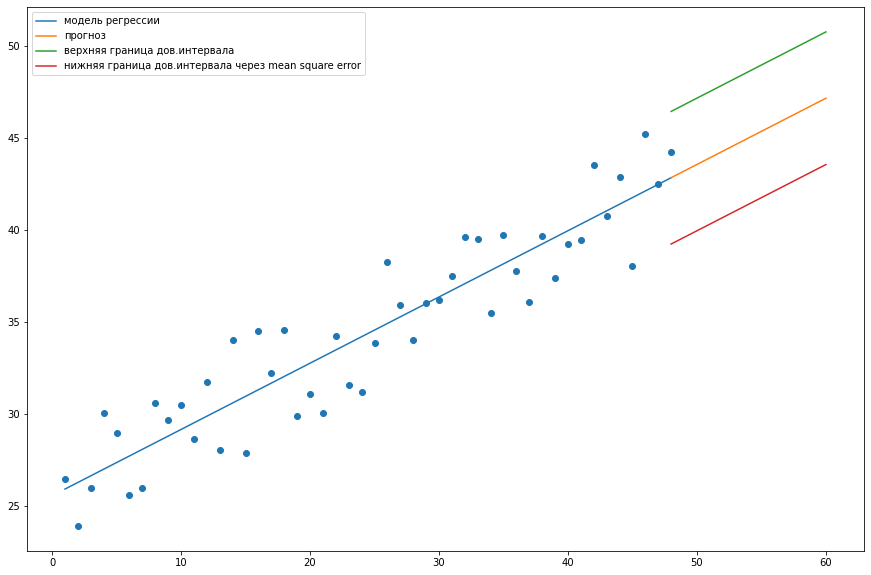

In [157]:
plt.figure(figsize=[15,10])
plt.scatter(range(1,df.shape[0]+1), df.y)
plt.plot(X,y_pred)
plt.plot(x_test,y_test)
plt.plot(x_test,y_up)
plt.plot(x_test,y_down)
plt.legend(['модель регрессии','прогноз','верхняя граница дов.интервала' ,\
            'нижняя граница дов.интервала через mean square error'])

plt.show()